In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    precision_recall_curve
)

In [2]:
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
df= pd.read_csv("1553768847-housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [4]:
df.isna().sum()
df.dropna(inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [5]:
X= df.copy()
m=X['longitude']
m= np.array(m)
m= np.abs(m)
X['longitude_abs']= m
X.drop(columns='longitude', inplace=True)

ocean_n=LabelEncoder()

X['ocean_n']=ocean_n.fit_transform(X['ocean_proximity'])
X.drop(columns='ocean_proximity', inplace=True)


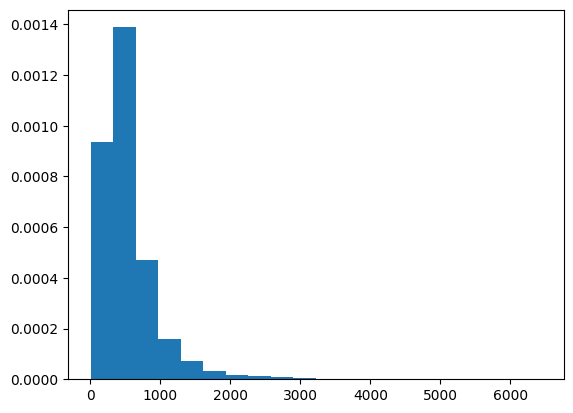

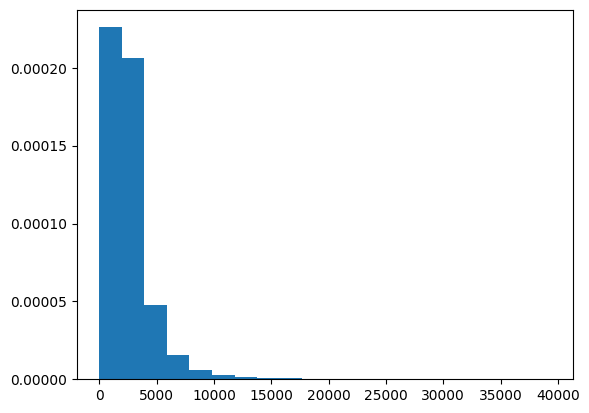

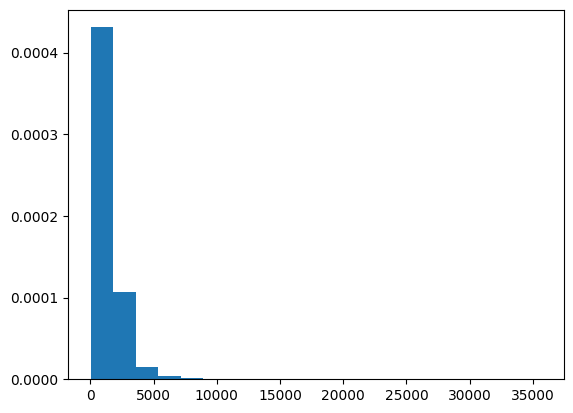

<Figure size 640x480 with 0 Axes>

In [6]:
r1=X['total_bedrooms']
r2= X['total_rooms']
r3= X['population']

r1= np.array(r1)
r2= np.array(r2)
r3= np.array(r3)

plt.hist(r1, bins=20, density=True)
plt.figure()
plt.hist(r2, bins=20,  density=True)
plt.figure()
plt.hist(r3, bins=20, density=True)
plt.figure()


X=X[X['total_bedrooms']<1000]
X=X[X['total_rooms']<5000]
X=X[X['population']<4000]


X
Y= X['median_house_value']
X.drop(columns='median_house_value', inplace=True)
# X

In [7]:
Y=Y/10000

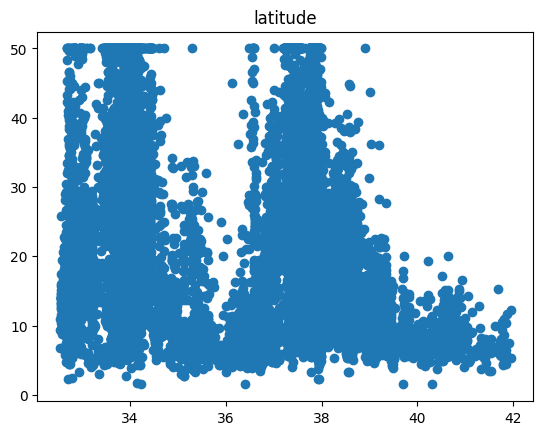

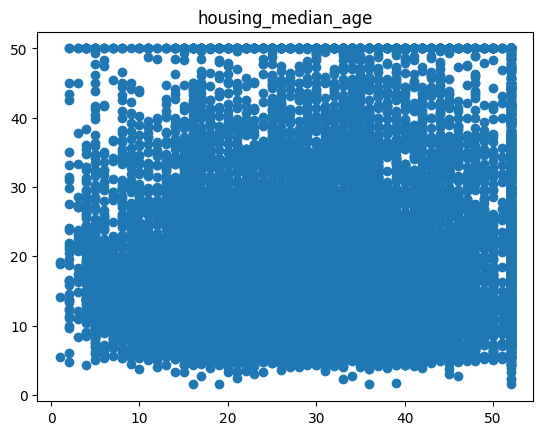

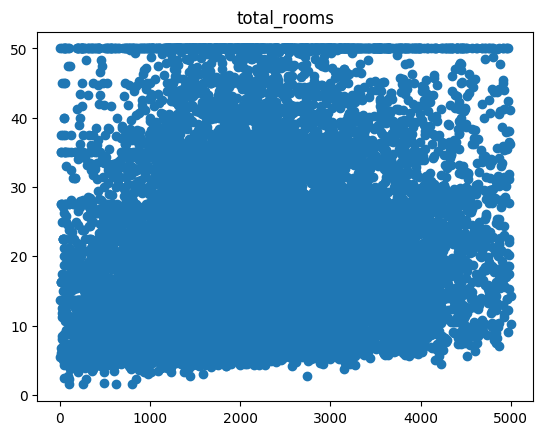

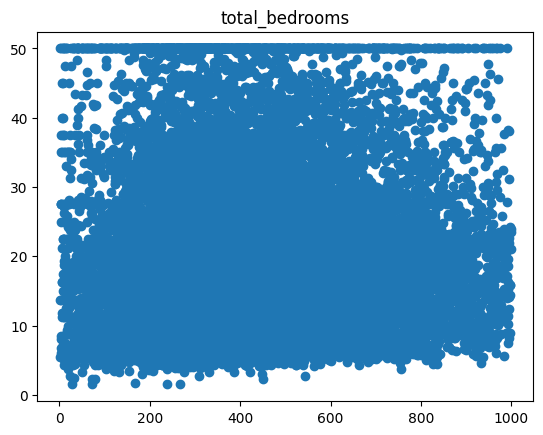

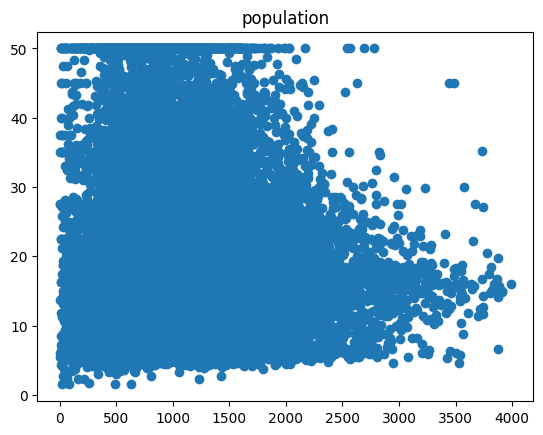

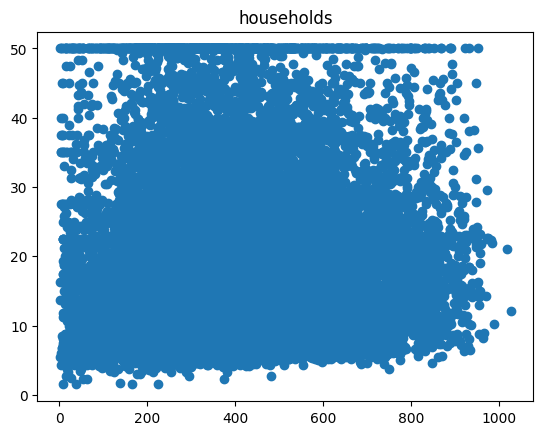

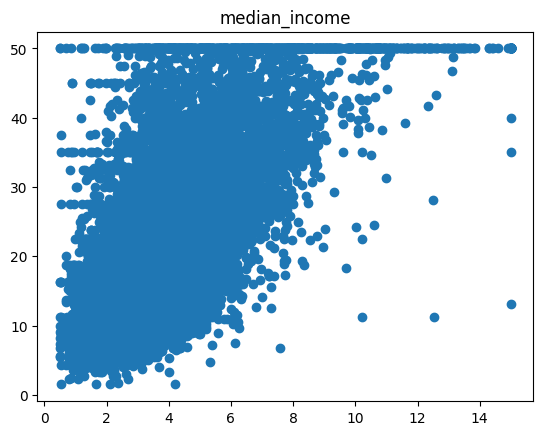

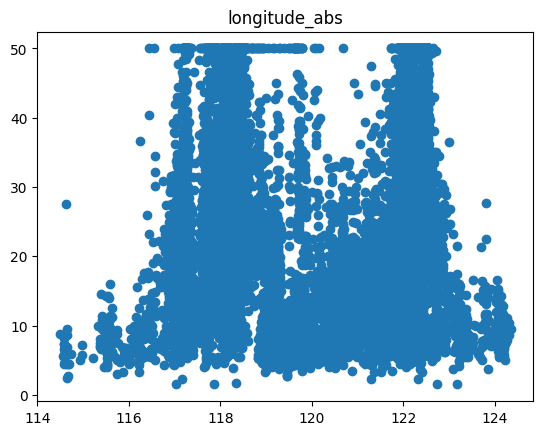

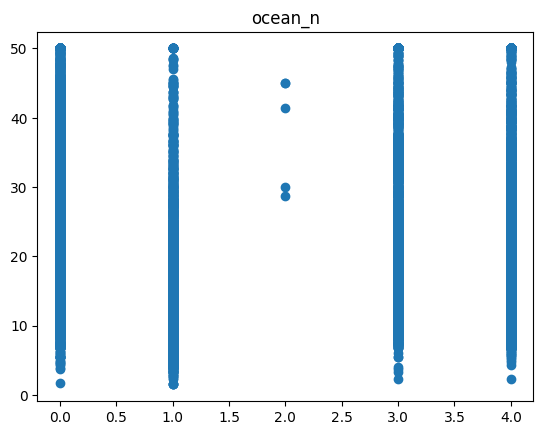

<Figure size 640x480 with 0 Axes>

In [8]:
L=X.columns
for i in L:
    plt.scatter(X[i],Y)
    plt.title(i)
    plt.figure()

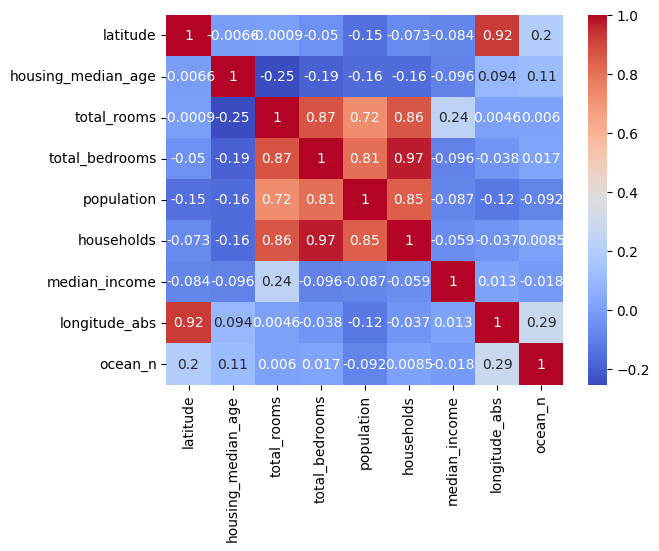

In [9]:
cm = X.corr()
sns.heatmap(cm, annot=True, cmap='coolwarm')
X.drop(columns='latitude', inplace=True)

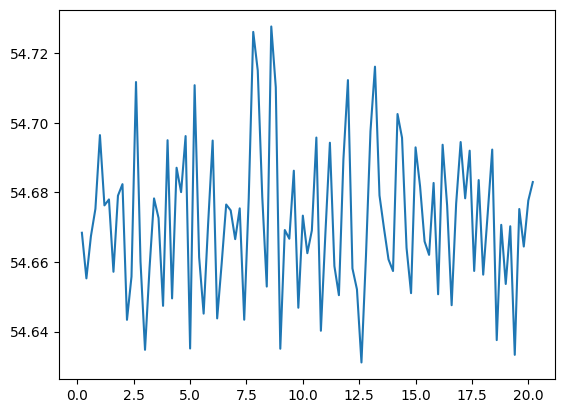

In [94]:
def L1_REG(aln):
    model_n= Ridge(alpha=aln)
    model_n.fit(X_train,Y_train)
    Y_pred= model_n.predict(X_test)
    mse=mean_squared_error(Y_test, Y_pred)
    return mse
    
step=0
skf = KFold(n_splits=5, shuffle=True)
mse_n, s_n=[],[]
Xn= np.array(X)
Yn= np.array(Y)


while(step<20):
    mse_a=0
    len=0
    for train_index, test_index in skf.split(Xn, Yn):
        X_train, X_test = Xn[train_index], Xn[test_index]
        Y_train, Y_test = Yn[train_index], Yn[test_index]
        mse_a= L1_REG(step)+mse_a
        len=len+1
    mean= mse_a/len
    mse_n.append(mean)
    step=step+0.2
    s_n.append(step)
        
        
plt.plot(s_n, mse_n) 
num= np.argmin(mse_n)
alp=s_n[num]

In [97]:
np.min(mse_n)

54.63110539741518

In [95]:
#******Kfold Cross Validation******#


def model_acc(model,X_train,Y_train,X_test,Y_test):
    model.fit(X_train,Y_train)
    Y_pred= model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    return[Y_pred,mse]


skf = KFold(n_splits=5, shuffle=True)
mse_0,mse_1,mse_2, mse_L=[],[],[],[]
counter=0

Xn= np.array(X)
Yn= np.array(Y)

for train_index, test_index in skf.split(Xn, Yn):
    X_train, X_test = Xn[train_index], Xn[test_index]
    Y_train, Y_test = Yn[train_index], Yn[test_index]
    L_model= Ridge(alp)
    Y_pred,mse_L=model_acc(model0,X_train,Y_train,X_test,Y_test)
    model0= LinearRegression()
    Y_pred,mse_0=model_acc(model0,X_train,Y_train,X_test,Y_test)
    model1= tree.DecisionTreeRegressor()
    Y_pred,mse_1= model_acc(model1,X_train,Y_train,X_test,Y_test)
    model2= RandomForestRegressor()
    Y_pred, mse_2= model_acc(model2, X_train,Y_train, X_test, Y_test)




[54.60822400714702, 54.60822400714702, 60.1771297057355, 30.435184033938217]

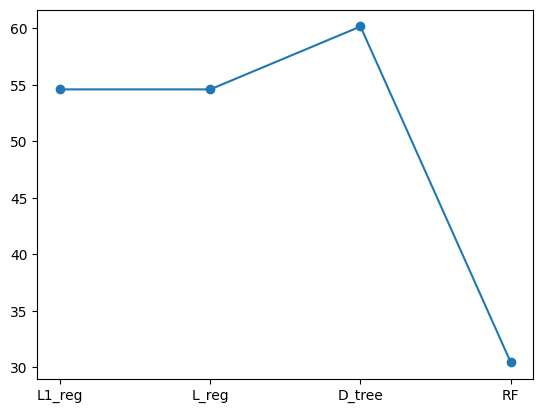

In [96]:
val= [np.mean(mse_L),np.mean(mse_0), np.mean(mse_1), np.mean(mse_2)]
labels=['L1_reg','L_reg', 'D_tree', 'RF']

plt.plot(labels, val, '-o')
val